# Image Classification --> CNN

- pip install tensorflow (python 3.7)

In [1]:
import tensorflow as tf

#### Keras Datasets:

- boston_housing module: Boston housing price regression dataset.
- cifar10 module: CIFAR10 small images classification dataset.
- cifar100 module: CIFAR100 small images classification dataset.
- fashion_mnist module: Fashion-MNIST dataset.
- imdb module: IMDB sentiment classification dataset.
- mnist module: MNIST handwritten digits dataset.
- reuters module: Reuters topic classification dataset.

In [2]:
cifar_data = tf.keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar_data.load_data()

Pixel intensity: 0 - 255 \
Dividing by 255 gives us pixels ranging between 0 and 1

In [67]:
X_valid, X_train = X_train_full[:1000] / 255.0, X_train_full[1000:5000] / 255.0
y_valid, y_train = y_train_full[:1000], y_train_full[1000:5000]
X_test = X_test[:500]
y_test = y_test[:500]

In [68]:
X_train.shape[1:]

(32, 32, 3)

In [69]:
def generate_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:]),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, (3, 3), strides=(2,2)),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256, (3, 3), strides=(2,2)),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Activation('softmax')
    ])

model = generate_model()

In [70]:
model.summary()

Model: "sequential_161"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_637 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 activation_957 (Activation)  (None, 30, 30, 32)       0         
                                                                 
 conv2d_638 (Conv2D)         (None, 14, 14, 256)       73984     
                                                                 
 activation_958 (Activation)  (None, 14, 14, 256)      0         
                                                                 
 max_pooling2d_319 (MaxPooli  (None, 7, 7, 256)        0         
 ng2D)                                                           
                                                                 
 activation_959 (Activation)  (None, 7, 7, 256)        0         
                                                    

In [71]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=256, epochs=25, validation_data=(X_valid, y_valid), shuffle=True)

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/25
16/16 [==============================] - 3s 170ms/step - loss: 2.2759 - accuracy: 0.1513 - val_loss: 2.1386 - val_accuracy: 0.2090
Epoch 2/25
16/16 [==============================] - 3s 161ms/step - loss: 2.1475 - accuracy: 0.2132 - val_loss: 2.0630 - val_accuracy: 0.2340
Epoch 3/25
16/16 [==============================] - 3s 159ms/step - loss: 2.0307 - accuracy: 0.2542 - val_loss: 2.0504 - val_accuracy: 0.2210
Epoch 4/25
16/16 [==============================] - 3s 159ms/step - loss: 1.9602 - accuracy: 0.2910 - val_loss: 2.0935 - val_accuracy: 0.2470
Epoch 5/25
16/16 [==============================] - 3s 165ms/step - loss: 1.9108 - accuracy: 0.3050 - val_loss: 2.1514 - val_accuracy: 0.2350
Epoch 6/25
16/16 [==============================] - 3s 167ms/step - loss: 1.8626 - accuracy: 0.3487 - val_loss: 1.7896 - val_accuracy: 0.3430
Epoch 7/25
16/16 [==============================] - 3s 167ms/step - loss: 1.7969 - accuracy: 0.3620 - val_loss: 1.8551 - val_accuracy: 0.3320
Epoch 

16/16 [==============================] - 0s 7ms/step
Confusion matrix, without normalization
[[17  3  0  0  0  1  1  0 34  1]
 [ 0 28  0  0  0  0  0  0 12  1]
 [ 6  5  6  2  0  5  0  0 25  2]
 [ 0  7  1  9  0 15  0  0 15  2]
 [ 1  5  1  1  0  2  0  1 26  3]
 [ 2  5  4  4  0 16  0  0 15  2]
 [ 1 14  1  3  0  5 15  0 14  1]
 [ 3  8  0  2  1  5  0  2 19  7]
 [ 3  6  0  0  0  1  0  0 46  1]
 [ 0 11  0  0  0  0  1  0 29 15]]


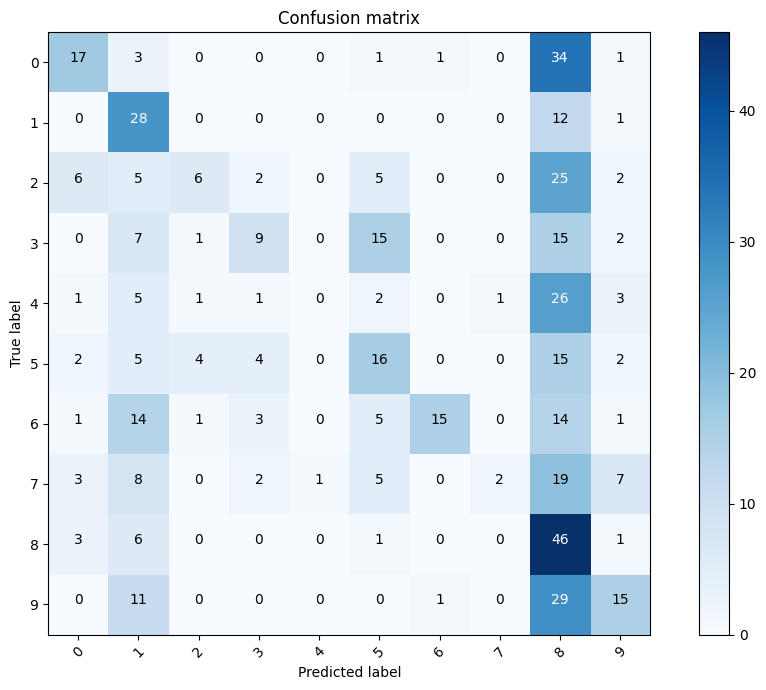

In [72]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot  as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


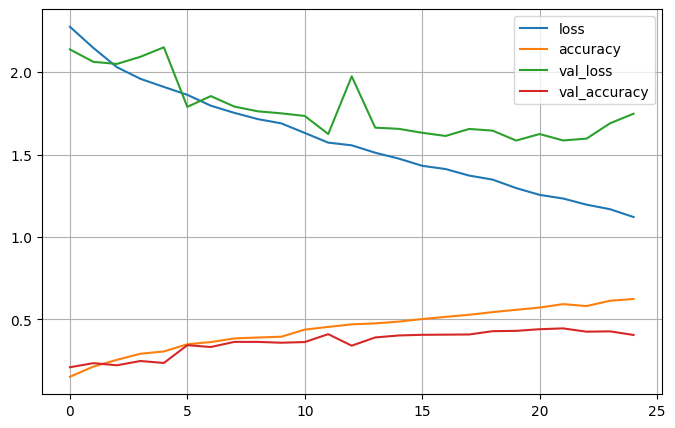

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

### LeNet architecture

In [49]:
lenet_5_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=X_train[0].shape, padding='same'), #C1
    tf.keras.layers.AveragePooling2D(), #S2
    tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    tf.keras.layers.AveragePooling2D(), #S4
    tf.keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    tf.keras.layers.Flatten(), #Flatten    
    tf.keras.layers.Dense(84, activation='tanh'), #F6
    tf.keras.layers.Dense(10, activation='softmax') #Output layer
])

In [50]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
lenet_5_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = lenet_5_model.fit(X_train, y_train, batch_size=256, epochs=25, validation_data=(X_valid, y_valid), shuffle=True)

scores = lenet_5_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/25


C:\Users\gudev\anaconda3\envs\busa\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 68ms/step - loss: 2.2465 - accuracy: 0.1673 - val_loss: 2.1165 - val_accuracy: 0.2800
Epoch 2/25
6/6 [==============================] - 0s 54ms/step - loss: 2.1011 - accuracy: 0.2553 - val_loss: 2.0279 - val_accuracy: 0.2880
Epoch 3/25
6/6 [==============================] - 0s 48ms/step - loss: 1.9847 - accuracy: 0.3087 - val_loss: 2.0203 - val_accuracy: 0.2600
Epoch 4/25
6/6 [==============================] - 0s 48ms/step - loss: 1.9486 - accuracy: 0.3100 - val_loss: 1.9426 - val_accuracy: 0.3100
Epoch 5/25
6/6 [==============================] - 0s 48ms/step - loss: 1.9406 - accuracy: 0.2947 - val_loss: 1.8822 - val_accuracy: 0.3480
Epoch 6/25
6/6 [==============================] - 0s 48ms/step - loss: 1.8974 - accuracy: 0.3413 - val_loss: 1.8701 - val_accuracy: 0.3360
Epoch 7/25
6/6 [==============================] - 0s 48ms/step - loss: 1.8249 - accuracy: 0.3573 - val_loss: 1.8368 - val_accuracy: 0.3480
Epoch 8/25
6/6 [======================

### Using pretrained models

https://keras.io/api/applications/resnet/

In [62]:
base_model = tf.keras.applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= X_train.shape[1:])

In [ ]:
opt = tf.keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
base_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = base_model.fit(X_train, y_train, batch_size=256, epochs=25, validation_data=(X_valid, y_valid), shuffle=True)

scores = base_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

### Save and Load models

In [70]:
model.save('CNN_CIFAR.h5')

In [71]:
from keras.models import load_model
model = load_model('CNN_CIFAR.h5')

### Grid Search - parameter tuning

In [78]:
def create_model(optimizer='rmsprop'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2,2)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Conv2D(64, (3, 3)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

In [79]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

model_cnn = KerasClassifier(build_fn=create_model)
optimizers = ['rmsprop', 'adam']
epochs = np.array([50, 100, 150])
param_grid = dict(optimizer=optimizers,  nb_epoch=epochs)

grid = GridSearchCV(estimator=model_cnn, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

print("Best: %s" % (grid_result.best_params_))


C:\Users\gudev\anaconda3\envs\busa\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """


125/125 [==============================] - 2s 15ms/step - loss: 2.1782 - accuracy: 0.1730
Best: {'nb_epoch': 150, 'optimizer': 'adam'}
